# Estudi del patró de difracció del telescopi James Webb

**1)** En aquest exercici es vol estudiar el patró de difracció observat a les imatges del telescopi espacial James Webb. Per tal de determinar l'efecte del mirall principal i el suport del mirall secundari, s'analitzarà el patró de difracció de diferents obertures.

In [1]:
# Importació de llibreries i definició de funcions (fft)

import numpy as np
import matplotlib.pyplot as plt

fshift = np.fft.fftshift
ifshift = np.fft.ifftshift
fft = lambda im, pad, pad2: fshift(np.fft.fft2(ifshift(im), (pad, pad2)))
ifft = lambda im, pad, pad2: ifshift(np.fft.ifft2(fshift(im), (pad, pad2)))

**Webs d'interès**

https://webb.nasa.gov/content/about/comparisonWebbVsHubble.html
https://threadreaderapp.com/thread/1545048944467513345.html

**i)** Descarregueu les imatges de les diferents obertures que teniu penjades a la tasca. Representeu gràficament les obertures en el quadern de jupyter. Per tal de millorar la resolució en freqüència i evitar problemes d'aliasing en la transformada de Fourier, haureu d'afegir zeros (zero-padding) a les imatges de les obertures. Per fer-ho, podeu utilitzar les següents línies de codi: 

```P = 2500
obertura = plt.imread("obertura.png")[:, :, 0]
obertura_pad = np.pad(obertura, P)


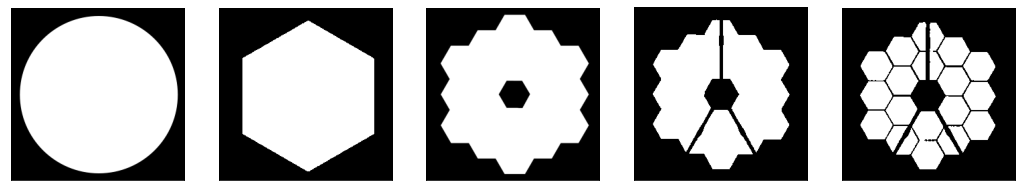

In [6]:
# Descàrrega d'imatges i 
# zero padding per per millorar la resolució de la transformada de Fourier

P=2500

circular = plt.imread("circular_mirror.png")[:,:,0]
circular_pad=np.pad(circular,P)

Hexagon_webb = plt.imread("Hexagon_webb_binarized.png")[:,:,0]
Hexagon_webb_pad=np.pad(Hexagon_webb,P)

Hexagonal_mirror_webb = plt.imread("Hexagonal_mirror_webb_binarized.png")[:,:,0]
Hexagonal_mirror_webb_pad=np.pad(Hexagonal_mirror_webb,P)

Hexagonal_mirror_holder_webb = plt.imread("Hexagonal_mirror_holder_webb_binarized.png")[:,:,0]
Hexagonal_mirror_holder_webb_pad=np.pad(Hexagonal_mirror_holder_webb,P)

Hexagonal_submirrors_holder_webb = plt.imread("Hexagonal_submirrors_holder_webb_binarized.png")[:,:,0]
Hexagonal_submirrors_holder_webb_pad=np.pad(Hexagonal_submirrors_holder_webb,P)

# graficar les diferents obertures

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(18, 18))

ax1.imshow(circular, cmap='gray')
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)

ax2.imshow(Hexagon_webb, cmap='gray')
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)

ax3.imshow(Hexagonal_mirror_webb, cmap='gray')
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)

ax4.imshow(Hexagonal_mirror_holder_webb, cmap='gray')
ax4.axes.xaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)

ax5.imshow(Hexagonal_submirrors_holder_webb, cmap='gray')
ax5.axes.xaxis.set_visible(False)
ax5.axes.yaxis.set_visible(False)

**ii)** El patró de difracció de Fraunhofer de l'obertura (en intensitat) es pot determinar a través del mòdul al quadrat de la seva transformada de Fourier. Per obrenir la transformada de Fourier (normalitzada respecte al seu màxim) podeu utilitzar l'algoritme de la transformada de Fourier discreta en la seva forma bidimensional, tal i com s'indica a continuació: 

```
obertura_WEBB_FFT = np.abs(np.fft.fftshift(np.fft.fft2(obertura_pad)))**2
obertura_WEBB_FFT /= obertura_WEBB_FFT.max()


In [4]:
# Càlcul de les transformades de Fourier

circular_WEBB_FFT = np.abs(np.fft.fftshift(np.fft.fft2(circular_pad)))**2
circular_WEBB_FFT /= circular_WEBB_FFT.max()

Hexagon_WEBB_FFT = np.abs(np.fft.fftshift(np.fft.fft2(Hexagon_webb_pad)))**2
Hexagon_WEBB_FFT /= Hexagon_WEBB_FFT.max()

Hexagon_mirror_WEBB_FFT = np.abs(np.fft.fftshift(np.fft.fft2(Hexagonal_mirror_webb_pad)))**2
Hexagon_mirror_WEBB_FFT /= Hexagon_mirror_WEBB_FFT.max()

Hexagon_mirror_holder_WEBB_FFT = np.abs(np.fft.fftshift(np.fft.fft2(Hexagonal_mirror_holder_webb_pad)))**2
Hexagon_mirror_holder_WEBB_FFT /= Hexagon_mirror_holder_WEBB_FFT.max()

Hexagon_submirrors_holder_WEBB_FFT = np.abs(np.fft.fftshift(np.fft.fft2(Hexagonal_submirrors_holder_webb_pad)))**2
Hexagon_submirrors_holder_WEBB_FFT /= Hexagon_submirrors_holder_WEBB_FFT.max()


FFT_appended = [circular_WEBB_FFT,Hexagon_WEBB_FFT,
                Hexagon_mirror_WEBB_FFT,
                Hexagon_mirror_holder_WEBB_FFT,
                Hexagon_submirrors_holder_WEBB_FFT] 

**iii)** Representeu gràficament i discutiu qualitativament els patrons de difracció obtinguts per a cada una de les obertures. Per poder veure en detall tot el patró podeu saturar la imatge controlant els paràmetres vmin i vmax de la funció imshow.

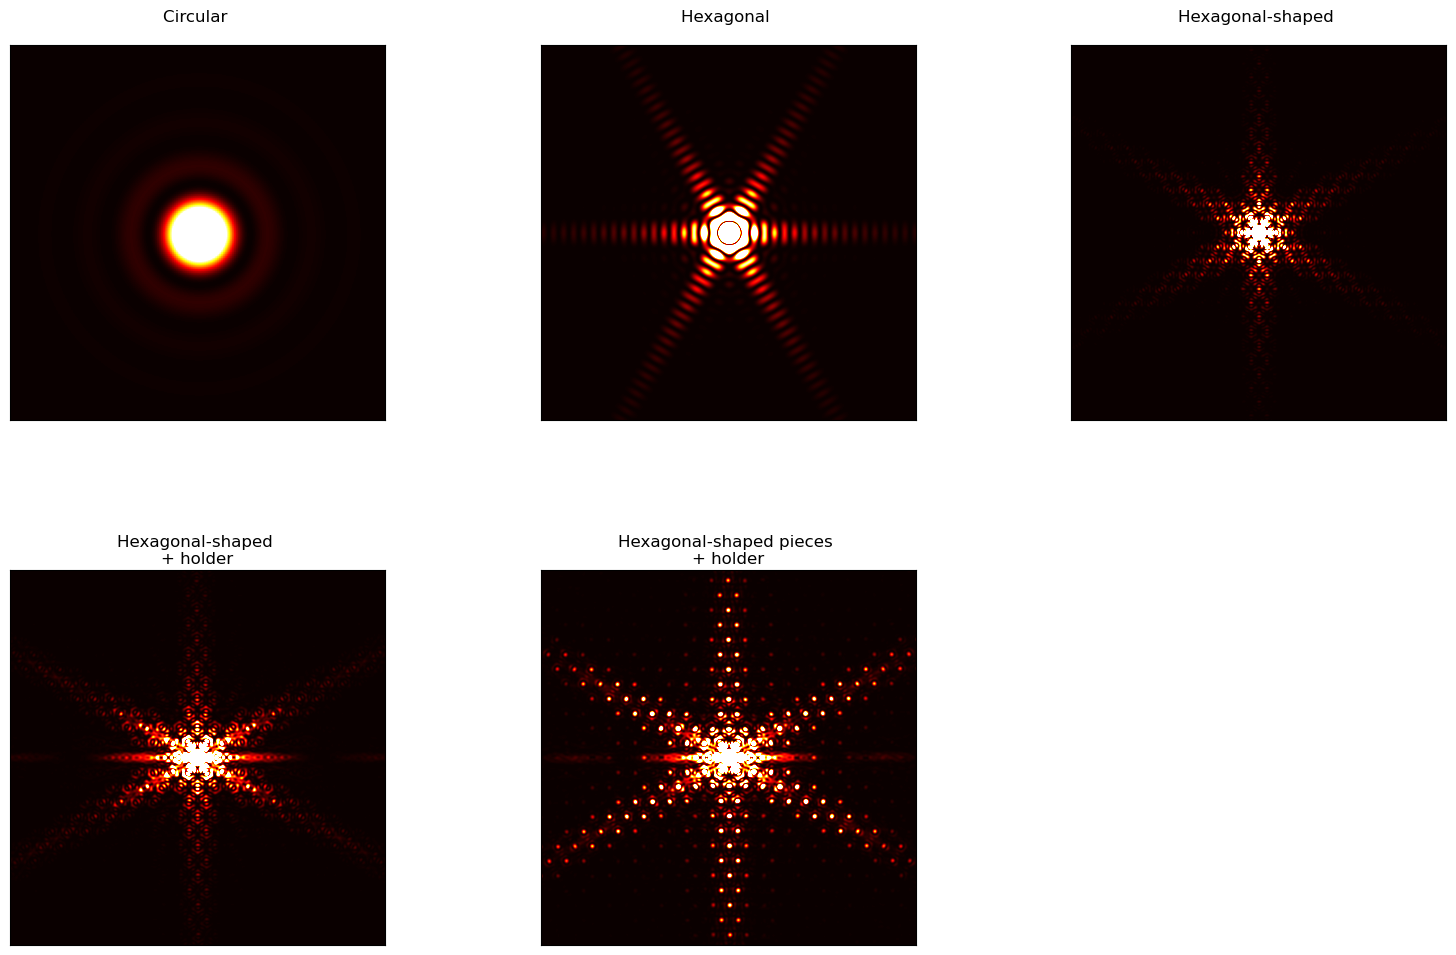

In [5]:
# Graficar imatges de difracció

lims=[100,500,1500,1500,1500]
saturation=[0.5,2.5,3.5,3.5,3.5]
titles=['Circular \n','Hexagonal \n','Hexagonal-shaped \n','Hexagonal-shaped \n+ holder','Hexagonal-shaped pieces \n+ holder']

plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)
for n in range(5):
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n + 1)
    ax.imshow(FFT_appended[n], vmin=0, vmax=10**-saturation[n], cmap='hot')
    #ax.imshow(my_list[n], vmin=0, vmax=10**-1.5, cmap='hot')
    ax.set_xlim(FFT_appended[n].shape[0]/2-lims[n],FFT_appended[n].shape[0]/2+lims[n])
    ax.set_ylim(FFT_appended[n].shape[1]/2-lims[n],FFT_appended[n].shape[1]/2+lims[n])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_title(titles[n], loc='center', wrap=True)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

**iv)** Analitzant l'efecte de saturar més o menys els patrons de difracció obtinguts, discutiu quines estrelles es veuran més afectades per la difracció. 

(630.0, 4630.0)

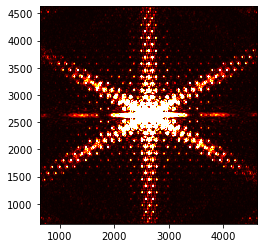

In [5]:
n=4
lim=2000

plt.imshow(FFT_appended[n], vmin=0, vmax=10**-4.5, cmap='hot')
plt.xlim(FFT_appended[n].shape[0]/2-lim,FFT_appended[n].shape[0]/2+lim)
plt.ylim(FFT_appended[n].shape[1]/2-lim,FFT_appended[n].shape[1]/2+lim)

#plt.savefig("test.png", dpi=150)